<h1>Final Project Report</h1>

**What factors can be used to diagnose a patient with heart disease?**

<h1>Introduction</h1>

Heart disease, also known as cardiovascular disease, refers to a range of conditions that affect the heart and blood vessels. Among these conditions is Coronary Artery Disease (CAD), which is characterized by the narrowing of blood vessels leading to the heart. According to the World Health Organization (WHO), heart disease is the leading cause of death worldwide, with CAD accounting for the majority of these deaths (World Health Organization, 2021). There are a multidue of variables that could contribute to the development and diagnosis of heart disease in an individual. This research project analyzes data provided by the Hungarian Institute of Cardiology (Janosi et al., 1988) to answer the question, “What factors can be used to diagnose a patient with heart disease?”. The original database, the processed.hungarian.data, contains 76 attributes (a mix of categorical and continuous), but the publishers considered only a subset of 14 attributes to be of importance. The data set has 14 columns and 294 rows. The response variable that will be used to classify the presence or absence of heart disease is the "num" attribute, which has two binary labels: "0" for the absence of heart disease and "1" for the presence of heart disease.

<h1>Methods and Results</h1>

<h2>Preliminary Exploratory Data Analysis</h2>

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.3     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.4     ✔ yardstick    1.1.0
✔ recipes      1.0.5     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

<h4>1. Reading dataset from web:</h4>

In [2]:
data_raw <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", delim=",", col_names = FALSE)
colnames(data_raw) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
tail(data_raw)


data <- data_raw|>
        mutate(diagnosis = num)|>
        select(-num)
tail(data)

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
52,1,4,140,266,0,0,134,1,2.0,2,?,?,1
52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
58,0,2,180,393,0,0,110,1,1.0,2,?,7,1
65,1,4,130,275,0,1,115,1,1.0,2,?,?,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
52,1,4,140,266,0,0,134,1,2.0,2,?,?,1
52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
58,0,2,180,393,0,0,110,1,1.0,2,?,7,1
65,1,4,130,275,0,1,115,1,1.0,2,?,?,1


- Imported the raw data set from the web
- Changed the name of our response variable from "num" to "diagnosis" for simpler interpretation

<h4>2. Analyzing and choosing the predictor variables:</h4>

In [3]:
new_data_frame <- data|>
                select(-slope, -cp, -thal, -sex, -fbs, -restecg, -exang)
tail(new_data_frame)

age,trestbps,chol,thalach,oldpeak,ca,diagnosis
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
52,140,266,134,2.0,?,1
52,160,331,94,2.5,?,1
54,130,294,100,0.0,?,1
56,155,342,150,3.0,?,1
58,180,393,110,1.0,?,1
65,130,275,115,1.0,?,1


- Excluded the "ca" and "thal" variables because their columns do not contain data or contain very few observations
- Excluded the "sex", "slope", "cp", "fbs", "restecg", "exang" and "oldpeak" variables because they are categorical, and thus, cannot be used as predictors

Warning message:
"There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `trestbps = as.numeric(trestbps)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings."
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removing 1 row that contained a missing value"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 23 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removing 1 row that contained a missing value"
Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1 rows containing non-finite values (`stat_density()`)."
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 24 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, 

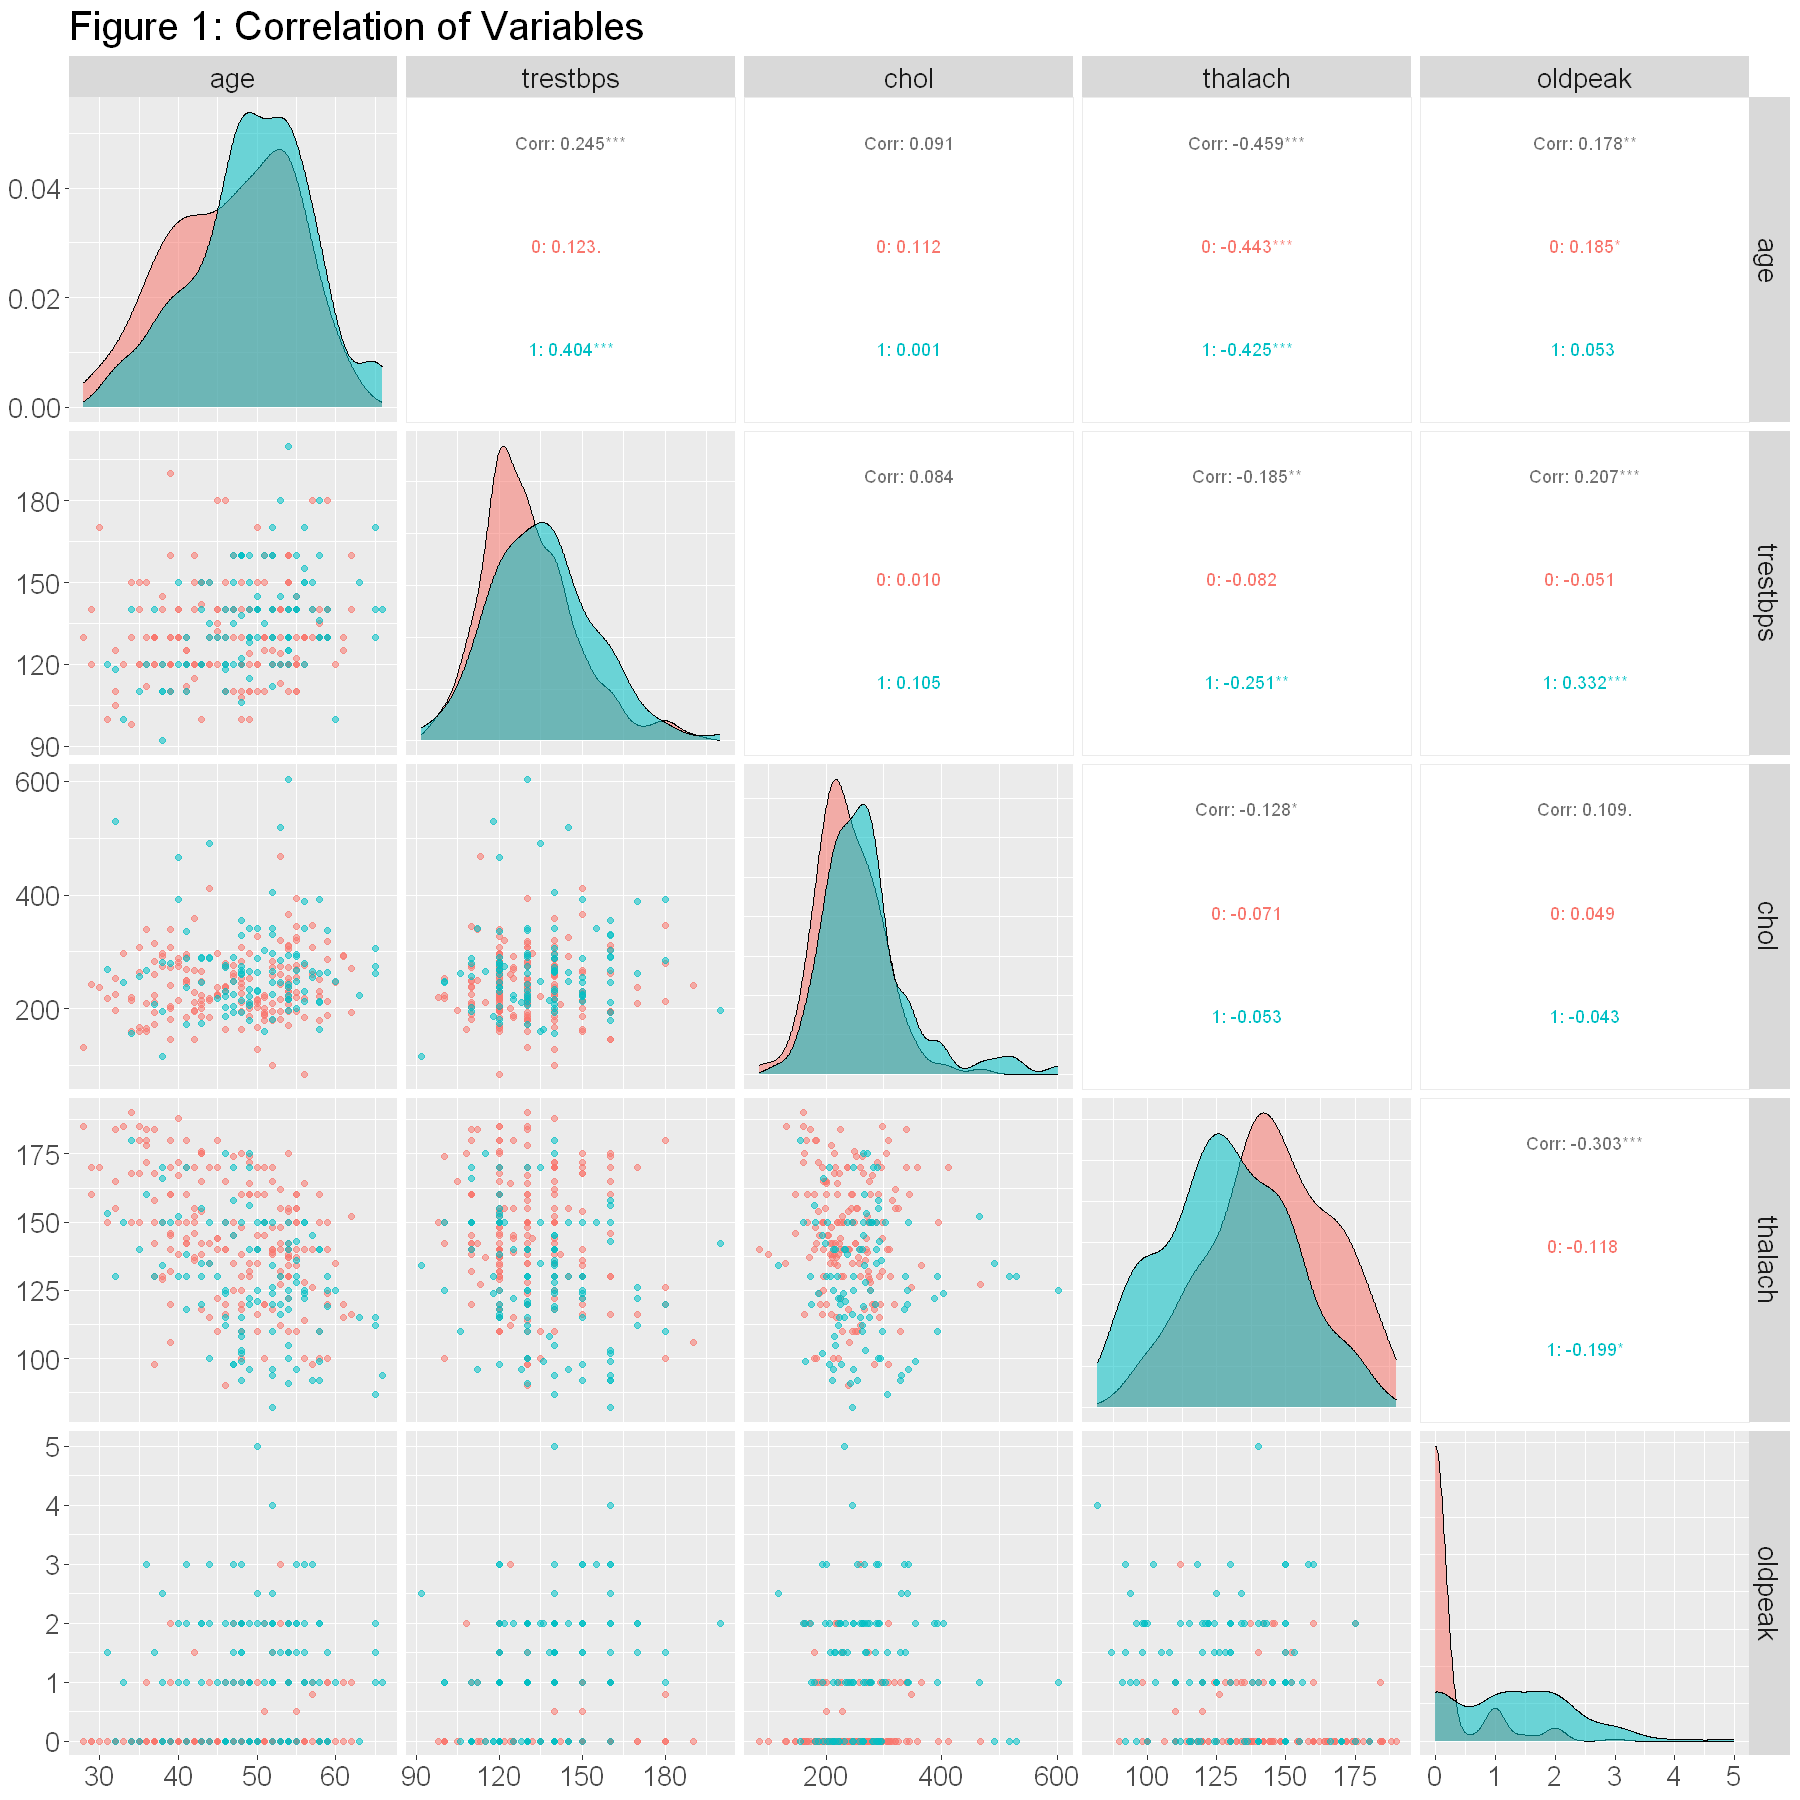

In [4]:
options(repr.plot.width = 15, repr.plot.height = 15)
pairs <- new_data_frame |>
    select(age, trestbps, chol, thalach, oldpeak, diagnosis) |>
    filter(trestbps != '?' | chol != '?' | thalach != '?') |>
    mutate(trestbps = as.numeric(trestbps), oldpeak = as.numeric(oldpeak), chol = as.numeric(chol), thalach = as.numeric(thalach), diagnosis = as.factor(diagnosis)) |>
    ggpairs(columns = 1:5, aes(color = diagnosis, alpha = 0.2), title = "Figure 1: Correlation of Variables") +
    theme(text = element_text(size = 20))

pairs

- The ggpairs plot above shows the relationship between the five possible predictor variables. It can be observed that the cholestrol level ("chol") and resting blood pressure ("trestbps") variables have the lowest correlation. This means that they are very different, and thus, can be useful for our prediction. 
 
- It is noteworthy to mention that the relationship between cholestrol level and age also shows an extremely low correlation. However, background research shows that resting blood pressure is a more reliable risk factor for heart disease than age, since regardless of one’s age there is a possibility of having dangerously high blood pressure, which is a possible sign of heart disease (Centers for Disease Control and Prevention, 2023). Thus, we chose "trestbps" over "age" as our second predictor. 

<h4>3. Cleaning, wrangling, and tidying the data:</h4>

In [5]:
tidy_data <- data |>
    select(trestbps, chol, diagnosis)

head(tidy_data)

trestbps,chol,diagnosis
<chr>,<chr>,<dbl>
130,132,0
120,243,0
140,?,0
170,237,0
100,219,0
105,198,0


- We selected our two predictor variables ("trestbps" and "chol") and our explanatory variable ("diagnosis"). The data did not require intensive cleaning/tidying.

<h4>4. Splitting into training and testing data:</h4>

In [6]:
set.seed(3456)
data_split <- initial_split(tidy_data, prop = 3/4, strata = diagnosis)
data_train <- training(data_split)
data_test <- testing(data_split)

head(data_train)
head(data_test)

trestbps,chol,diagnosis
<chr>,<chr>,<dbl>
120,243,0
105,198,0
125,254,0
120,298,0
130,161,0
98,220,0


trestbps,chol,diagnosis
<chr>,<chr>,<dbl>
130,132,0
140,?,0
170,237,0
100,219,0
110,225,0
150,214,0


- Split the tidy data into training and testing data subsets. 75% of the original data was used for training (we used this data subset to train our model), while the other 25% of the data was used at the very end to test the accuracy of our model.

<h4>5. Summarization of the training data:</h4>

In [7]:
missing_rows <- data_train |>
    filter(trestbps == '?' | chol == '?') |>
    count()

avg_chol <- data_train |>
    select(chol) |>
    filter(chol != '?') |>
    mutate(chol = as.numeric(chol)) |>
    colMeans()

avg_trestbps <- data_train |>
    select(trestbps) |>
    filter(trestbps != '?') |>
    mutate(trestbps = as.numeric(trestbps)) |>
    colMeans()

summary_table <- data.frame(n = missing_rows, predictors_used = 2, mean_chol = avg_chol, mean_trestbps = avg_trestbps) |>
    as_tibble() |>
    mutate(incomplete_rows = n) |>
    select(!n)

summary_table

predictors_used,mean_chol,mean_trestbps,incomplete_rows
<dbl>,<dbl>,<dbl>,<int>
2,254.4902,132.589,17


- As the first step in our summarization of the training data, we used a series of wrangling functions to create a brief comprehensive summary of data_train:
    - Filtered for incomplete rows in the training data, and then used the count function to calculate the number of incomplete rows.
    - Filtered out '?' for both of our predictor variables, chol and trestbps, so that they can be mutated into numeric data (double). Then, the colMeans function was used to calculate the average of each predictor variable.
    - Lastly, a summary table was produced with 4 columns and 1 row: number of predictors used, mean cholesterol level, mean resting blood pressure, and the number of incomplete rows.

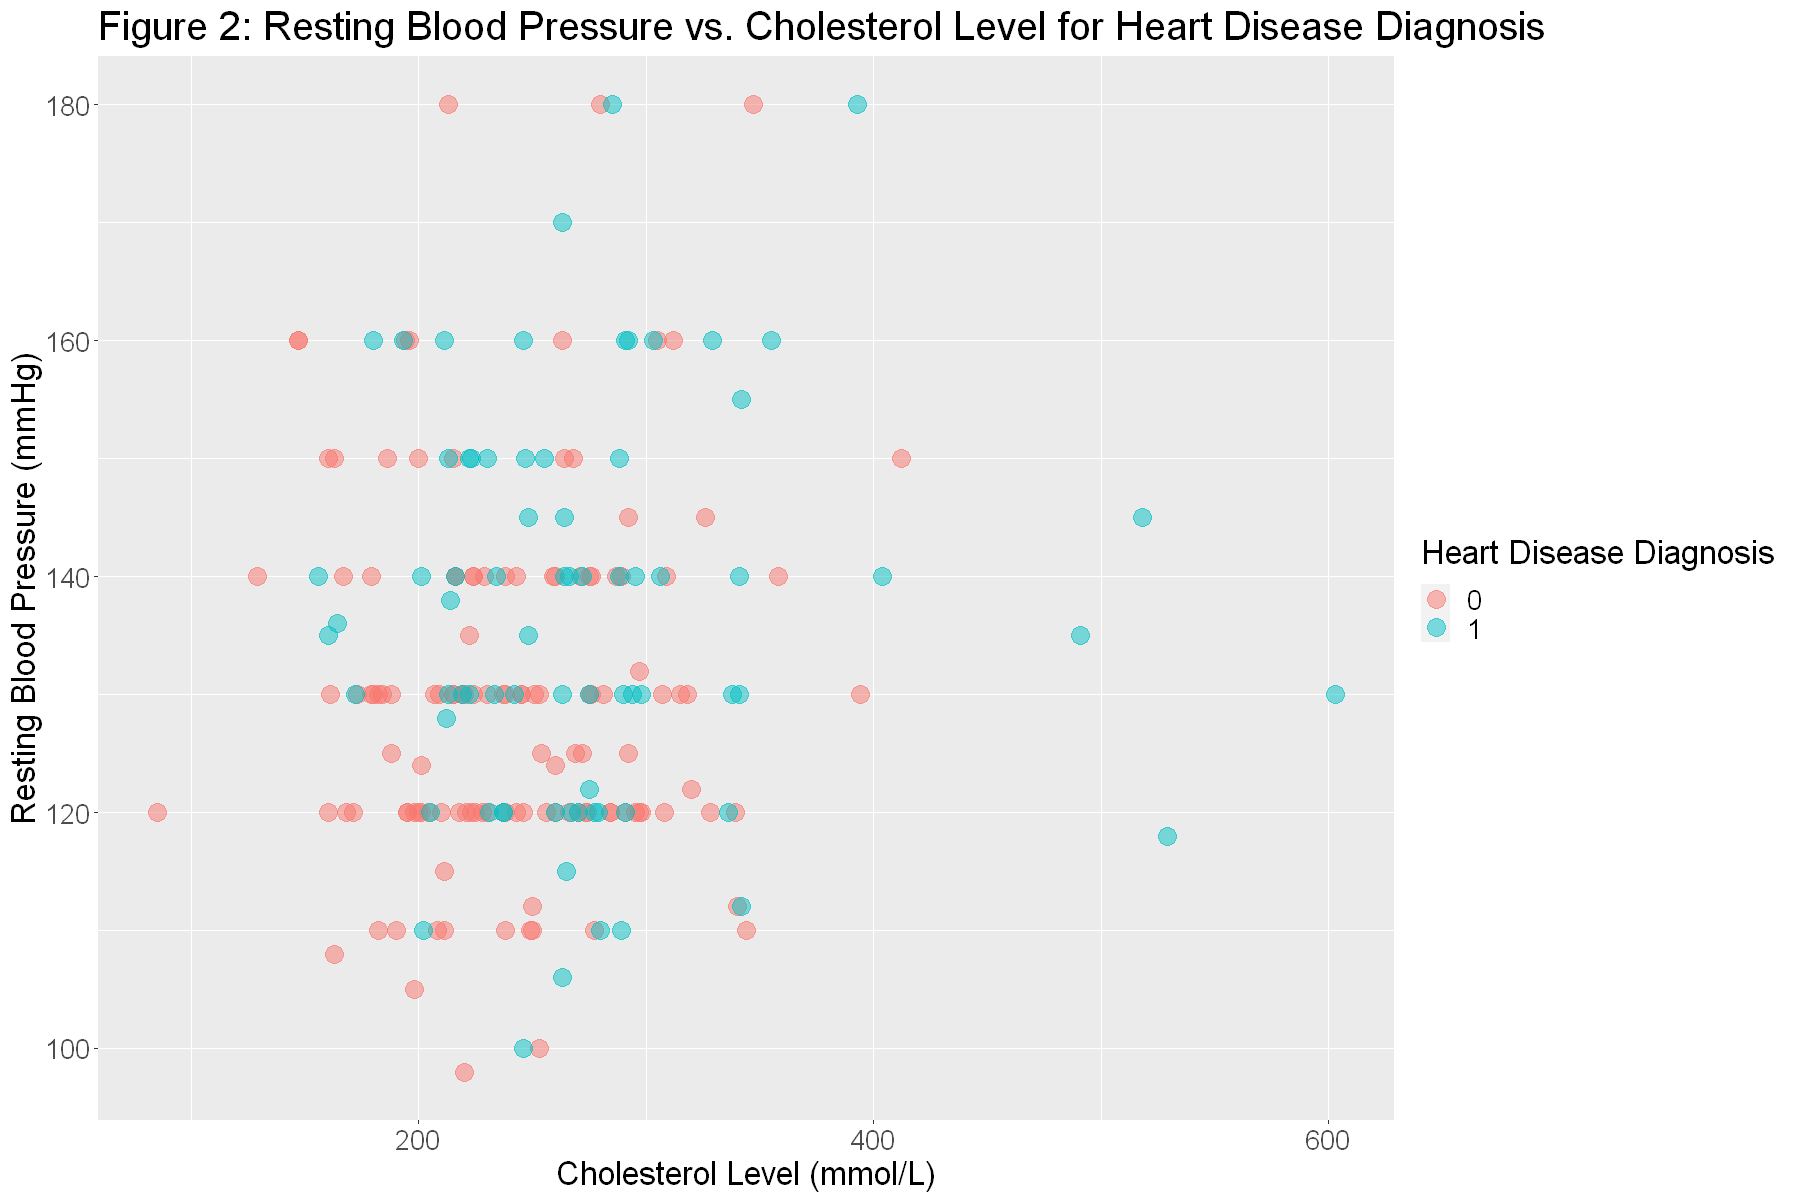

In [8]:
data_train <- data_train |>
    filter(chol != '?' & trestbps != '?') |>
    mutate(chol = as.numeric(chol), trestbps = as.numeric(trestbps), diagnosis = as.factor(diagnosis))

options(repr.plot.width = 15, repr.plot.height = 10)
training_data_plot <- data_train |> 
    ggplot(aes(x = chol, y = trestbps)) +
    geom_point(aes(color = diagnosis), size = 5, alpha = 0.5) +
    labs(x = "Cholesterol Level (mmol/L)", y = "Resting Blood Pressure (mmHg)", color = "Heart Disease Diagnosis") +
    ggtitle("Figure 2: Resting Blood Pressure vs. Cholesterol Level for Heart Disease Diagnosis") +
    theme(text = element_text(size = 20))

training_data_plot

- As the final step in our summarization of the training data, we produced a scatter plot showing the relationship between our two predictor variables and the response variable.
- It can be observed that there is a lot of overlap between the two classifications of "0" and "1" (or the absence and presence of heart disease).

<h2>Data Analysis</h2>

<h4>6. Making a recipe and building a model:</h4>

In [9]:
set.seed(3456)
heart_vfold <- vfold_cv(data_train, v = 5, strata = diagnosis)
heart_recipe <- recipe(diagnosis ~ chol + trestbps, data = data_train) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())
# heart_recipe

heart_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
# heart_tune

heart_metrics <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(heart_tune) |>
    tune_grid(resamples = heart_vfold, grid = tibble(neighbors = 1:15)) |>
    collect_metrics()

head(heart_metrics)

Warning message:
"package 'kknn' was built under R version 4.2.3"


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5665854,5,0.01589862,Preprocessor1_Model01
1,roc_auc,binary,0.5379487,5,0.01653180,Preprocessor1_Model01
2,accuracy,binary,0.5665854,5,0.01589862,Preprocessor1_Model02
2,roc_auc,binary,0.4962769,5,0.01860041,Preprocessor1_Model02
3,accuracy,binary,0.5268293,5,0.01422314,Preprocessor1_Model03
3,roc_auc,binary,0.4948615,5,0.01971515,Preprocessor1_Model03


- Used cross validation to build a tuning model so that we could see which $k$ gives the best accuracy.
    - Used the set.seed function to fix the randomness of our model.
    - Created a recipe that standardizes the training data.
    - Used the nearest_neighbor function to create a KNN classification tuning model.
    - Created a vfold of the training data.
    - Created a workflow with our recipe and model that tuned for the $k$ value.

<h4>7. Choosing the most accurate K neighbors value:</h4>

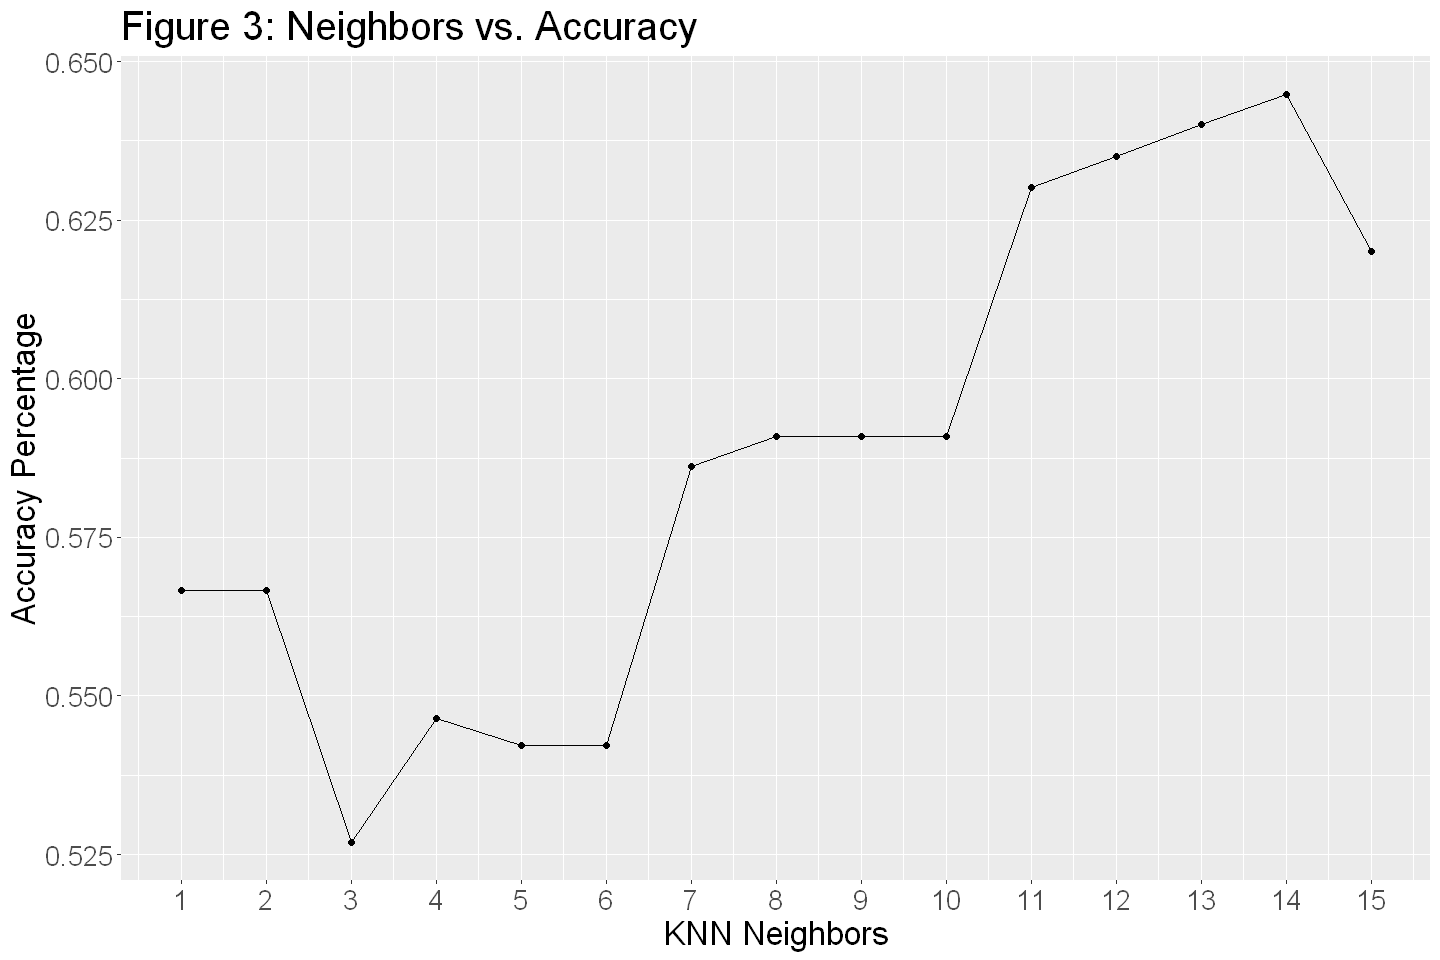

In [10]:
heart_results <- heart_metrics |>
    filter(.metric == "accuracy") |>
    select(neighbors, mean)
# heart_results

options(repr.plot.width = 12, repr.plot.height = 8)
metric_plot <- heart_results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    scale_x_continuous(breaks = c(1:15)) +
    ggtitle("Figure 3: Neighbors vs. Accuracy") +
    labs(x = "KNN Neighbors", y = "Accuracy Percentage")+
    theme(text=element_text(size=20))

metric_plot

- Used ggplot with the collected metrics from step 6 to plot the accuracy vs $k$ neighbors chosen. The plot helped us determine the best $k$ value to use.
- From the plot above, we see that $k=14$ gives the highest accuracy percentage. Therefore, we chose $k=14$ as the number of neighbors for our final model.

In [14]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 14) |>
      set_engine("kknn") |>
      set_mode("classification")

knn_fit <- workflow() |>
      add_recipe(heart_recipe) |>
      add_model(knn_spec) |>
      fit(data = data_train)

- Using 14 as the number of neighbors, we created a new fitted model that could now be used to classify unseen data (including the testing data subset).

<h4>8. Testing and determining the overall accuracy of our model:</h4>

In [12]:
data_test <- data_test |>
    filter(chol != '?' & trestbps != '?') |>
    mutate(chol = as.numeric(chol), trestbps = as.numeric(trestbps), diagnosis = as.factor(diagnosis))

knn_test_predictions <- predict(knn_fit, data_test) |>
      bind_cols(data_test)
# head(knn_test_predictions)

heart_prediction_accuracy <- knn_test_predictions |>
    metrics(truth = diagnosis, estimate = .pred_class) |>
    filter(.metric == "accuracy")

heart_prediction_accuracy


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5820896


- We can see that the overall estimation accuracy is around 58.2%, which is a bit low...

In [13]:
heart_conf_mat <- conf_mat(knn_test_predictions, truth = diagnosis, estimate = .pred_class)
heart_conf_mat

          Truth
Prediction  0  1
         0 34 21
         1  7  5

- The confusion matrix above gives us a another way to assess the estimation accuracy
- Our model was able to label 39 out of 67 observations correctly, while 28 out of 67 observations were incorrectly labeled


<h1>Discussion</h1>

Using the K-Nearest Neighbor classification algorithm, we attempted to answer the following predictive question: “What factors can be used to diagnose a patient with heart disease?”, with specific emphasis on Coronary Artery Disease (CAD) as the type of heart disease. After testing our trained model against out-of-sample data (the testing data subset) we found that our model had a 58.2% accuracy in diagnosing patients. In other words, our model was able to correctly label 39 out of 67 observations, where only 5 out of the 39 correct labels were for the diagnosis of “1” for the presence of heart disease. This accuracy is much lower than expected, and very unfavorable given the medical context of the classification problem.


The expectation was for our model to have a predictive accuracy of at least 70%, given the background research done on our chosen predictor variables as well as the context of the classification problem. A misdiagnosis can be life-threatening, so there was a higher expectation for accuracy. In particular, we expected to observe that cases with higher measurements of cholesterol or blood pressure would be classified as “1” for the presence of heart disease. High cholesterol level is typically an indicator of too much plaque in the blood vessels, and high resting blood pressure is also a direct indicator of plaque build-up in the vessels (Story, 2020). 


One important source of error that may have decreased the prediction accuracy is the chosen predictors. As explained under figure 1, we chose our two predictor variables based on the concept of lowest correlation to ensure that we were assessing heart disease through independent factors. Hence, we did not consider the relationship between the individual predictors and the response variable, which would have required choosing predictors with the least overlap between the “0” and “1” diagnoses. Figure 2 further depicts the highly unfavorable overlapping relationship between our two predictor variables and the diagnosis of heart disease. Given the low accuracy achieved by our model, it would be worthwhile to perform this analysis again, but with “thalach” and “oldpeak” as our predictors, which are the two variables showing the least amount of overlap between the diagnoses.


The low accuracy can also be attributed to class imbalance, since we did not balance the data during the preprocessing stage. The KNN classifier makes predictions based on “nearest neighbors”, so if one label, such as “0”, dominates the data, then the algorithm is much more likely to pick that diagnosis. This may explain the results of the confusion matrix, which showed that 34/39 of the correct labels were for the diagnosis of “0” while only 5/39 of the correct labels were for the diagnosis of “1”. Thus, for improvement of the model’s prediction accuracy, it is important to pay attention to possible class imbalance between the two classes in the dataset, and to balance the diagnoses using resampling techniques before training the model. 


Future improvements to our model are critical, given the potentially life-saving impact that an accurate classification model can have in the context of heart disease diagnosis. Heart disease often looks invisible from the outside; the first visible symptom can be a fatal incident, such as a heart attack. Thus, the ability to predict the presence of CAD, or the risk of developing CAD, will allow medical professionals to prevent unnecessary fatalities and improve the quality of life for individuals at higher risk. With our current model, there is only a 24% chance (based on the confusion matrix for a “1” diagnosis) that a patient with CAD will be diagnosed based on their cholesterol level and resting blood pressure. Our findings provide valuable feedback on how to improve our selection of parameters as well as the preprocessing stage of the data. At the end of the day, a false diagnosis of “1” is not harmful, while a false diagnosis of “0” can be fatal.


These findings have led us to a few questions for future investigation: Firstly, is there another type of model that can more accurately represent our data? If so, which model is it and how will it more accurately predict the class of observations? Secondly, is it possible to create a model that can accurately predict the diagnosis of heart disease when given data from other countries besides Hungary? Lastly, is there another type of heart disease that shares similar risk factors to CAD, and can we create a classification model that can differentiate between these highly comparable diseases?


<h1>References</h1>

Centers for Disease Control and Prevention. (2023, March 21). Heart disease: It can happen at any age. Centers for Disease Control and Prevention. Retrieved April 8, 2023, from https://www.cdc.gov/heartdisease/any_age.htm 

Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano , R. (1988, July 1). Heart Disease Data Set (Processed Hungarian Data). UCI Machine Learning Repository . Retrieved April 6, 2023, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease 

Story, C. M. (2020, March 29). What's the connection between high blood cholesterol and hypertension? Healthline. Retrieved April 9, 2023, from https://www.healthline.com/health/high-cholesterol/treating-with-statins/hypertension#1 

World Health Organization. (2021, June 11). Cardiovascular diseases (cvds). World Health Organization. Retrieved April 6, 2023, from https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds) 